<a href="https://colab.research.google.com/github/teja-1403/Breast-Cancer-Detection-using-Python/blob/main/BCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install required libraries
!pip install scikit-learn pyngrok matplotlib seaborn

In [3]:
# Import required libraries
import os
import cv2
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, StandardScaler

In [4]:
# Function to load dataset and preprocess the images
def Dataset_loader(DIR, RESIZE):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in os.listdir(DIR):
        PATH = os.path.join(DIR, IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype in [".jpg", ".jpeg", ".png"]:
            img = read(PATH)
            img = cv2.resize(img, (RESIZE, RESIZE))
            IMG.append(np.array(img))
    return IMG

In [7]:
dataset_path = "/content/drive/MyDrive/BCD"  # Path to the extracted folder

# Define the dataset directories for each category
train_path = os.path.join(dataset_path, 'Images', 'Train images')

benign_dir = os.path.join(train_path, 'Benign')
malignant_dir = os.path.join(train_path, 'Malignant')
normal_dir = os.path.join(train_path, 'Normal')

# Load the images from each folder
benign = np.array(Dataset_loader(benign_dir, 64))
malignant = np.array(Dataset_loader(malignant_dir, 64))
normal = np.array(Dataset_loader(normal_dir, 64))

# Step 3: Create Labels for each class
benign_label = np.zeros(len(benign))
malignant_label = np.ones(len(malignant))
normal_label = 2 * np.ones(len(normal))

Benign Images:


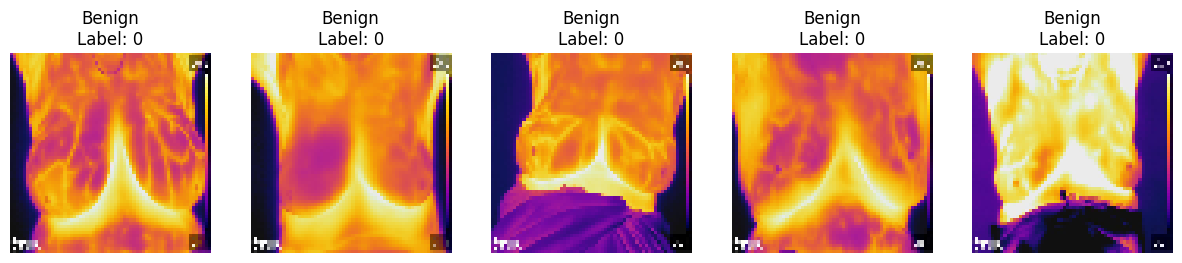



Malignant Images:


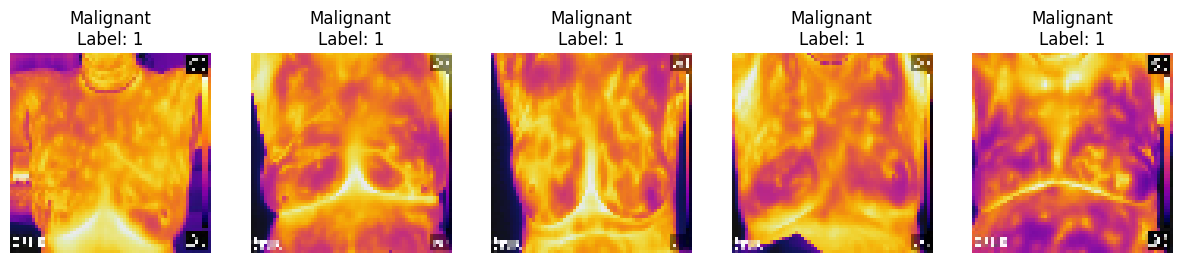



Normal Images:


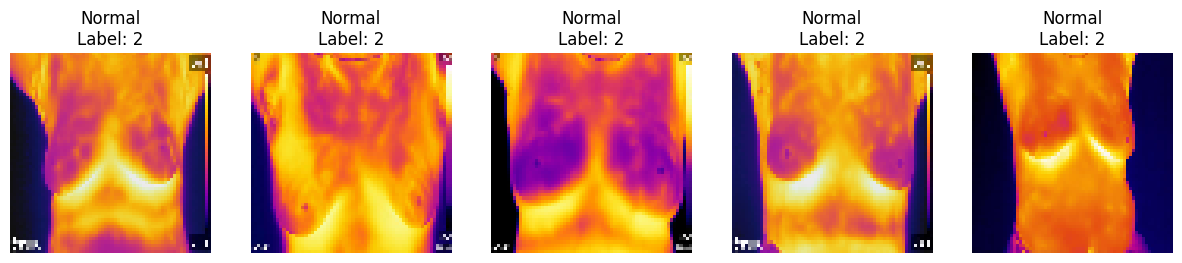

In [11]:
def display_images(images, labels, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"{title}\nLabel: {int(labels[i])}")
        plt.axis('off')
    plt.show()

# Display 5 images from each class
print("Benign Images:")
display_images(benign, benign_label, title="Benign")
print("\n")

print("Malignant Images:")
display_images(malignant, malignant_label, title="Malignant")
print("\n")

print("Normal Images:")
display_images(normal, normal_label, title="Normal")

In [12]:
# Combine the images and labels
X = np.concatenate((benign, malignant, normal), axis=0)
Y = np.concatenate((benign_label, malignant_label, normal_label), axis=0)

# Flatten images to be used as input features for the model
X = X.reshape(X.shape[0], -1)

# Split Data into Training and Testing Sets (33% test, 67% train)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Initialize all classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1500, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=1500, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}


Training Logistic Regression model...
Accuracy: 74.29%
F1-score: 74.73%
Recall: 74.29%
Precision: 76.75%


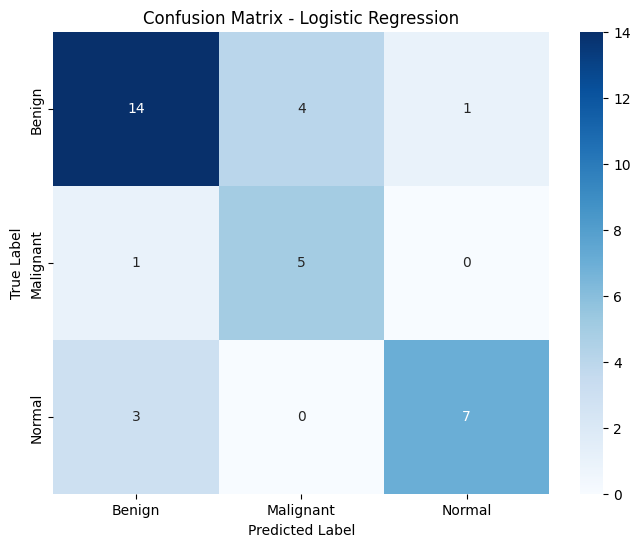

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

      Benign       0.78      0.74      0.76        19
   Malignant       0.56      0.83      0.67         6
      Normal       0.88      0.70      0.78        10

    accuracy                           0.74        35
   macro avg       0.74      0.76      0.73        35
weighted avg       0.77      0.74      0.75        35



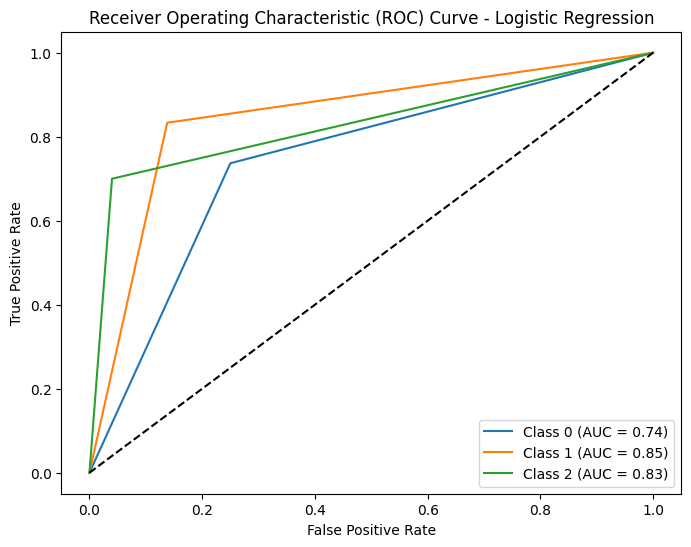


Training SVM model...
Accuracy: 77.14%
F1-score: 76.61%
Recall: 77.14%
Precision: 77.87%


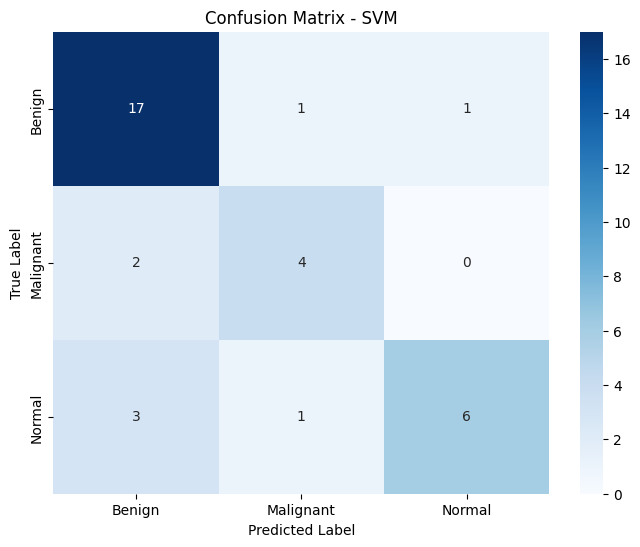

Classification Report for SVM:

              precision    recall  f1-score   support

      Benign       0.77      0.89      0.83        19
   Malignant       0.67      0.67      0.67         6
      Normal       0.86      0.60      0.71        10

    accuracy                           0.77        35
   macro avg       0.77      0.72      0.73        35
weighted avg       0.78      0.77      0.77        35



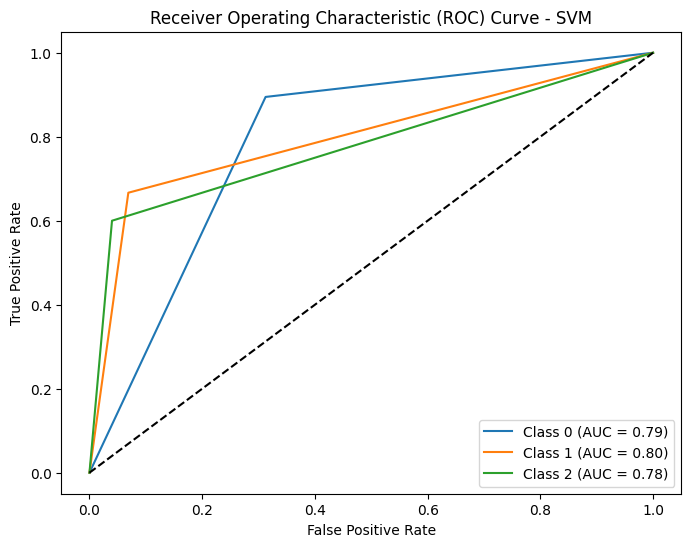


Training Random Forest model...
Accuracy: 74.29%
F1-score: 72.17%
Recall: 74.29%
Precision: 79.09%


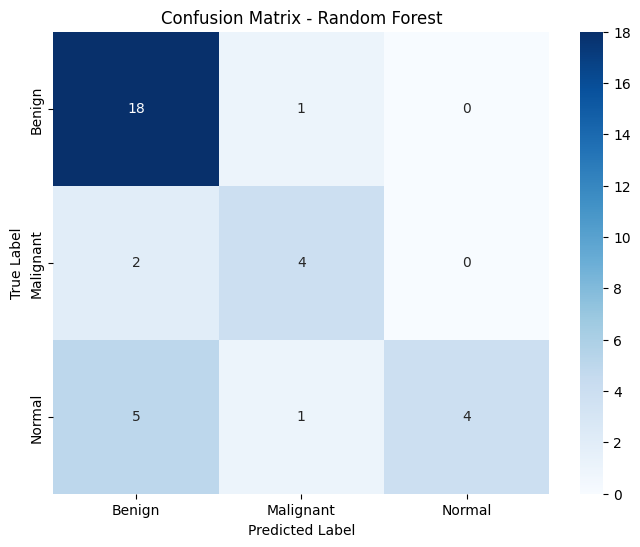

Classification Report for Random Forest:

              precision    recall  f1-score   support

      Benign       0.72      0.95      0.82        19
   Malignant       0.67      0.67      0.67         6
      Normal       1.00      0.40      0.57        10

    accuracy                           0.74        35
   macro avg       0.80      0.67      0.69        35
weighted avg       0.79      0.74      0.72        35



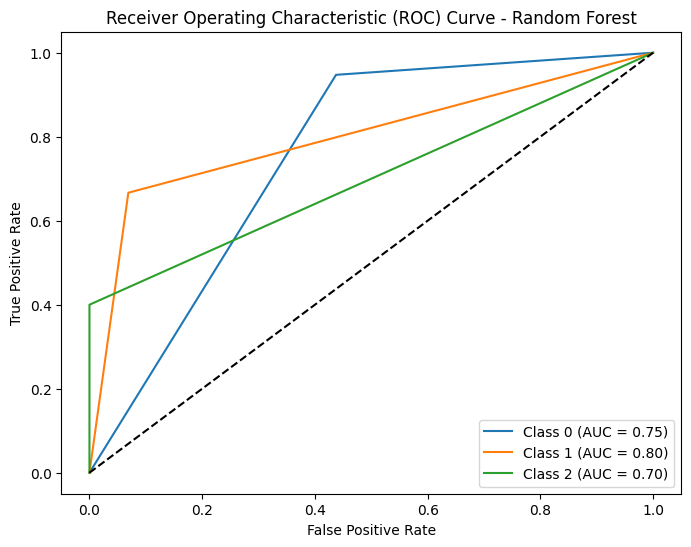


Training Decision Tree model...
Accuracy: 54.29%
F1-score: 52.89%
Recall: 54.29%
Precision: 53.54%


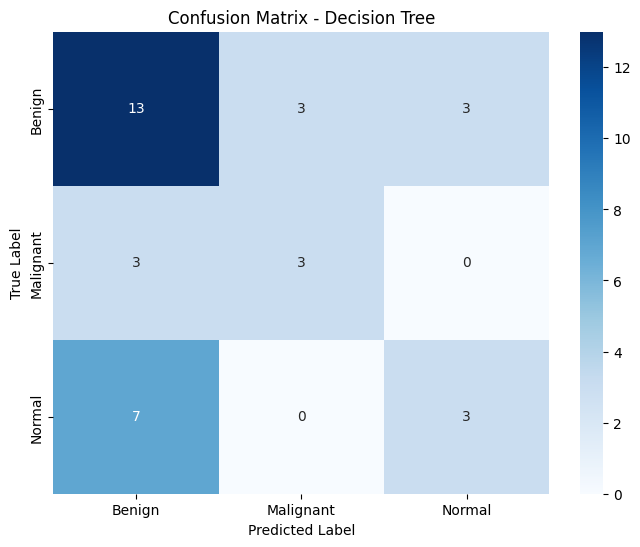

Classification Report for Decision Tree:

              precision    recall  f1-score   support

      Benign       0.57      0.68      0.62        19
   Malignant       0.50      0.50      0.50         6
      Normal       0.50      0.30      0.38        10

    accuracy                           0.54        35
   macro avg       0.52      0.49      0.50        35
weighted avg       0.54      0.54      0.53        35



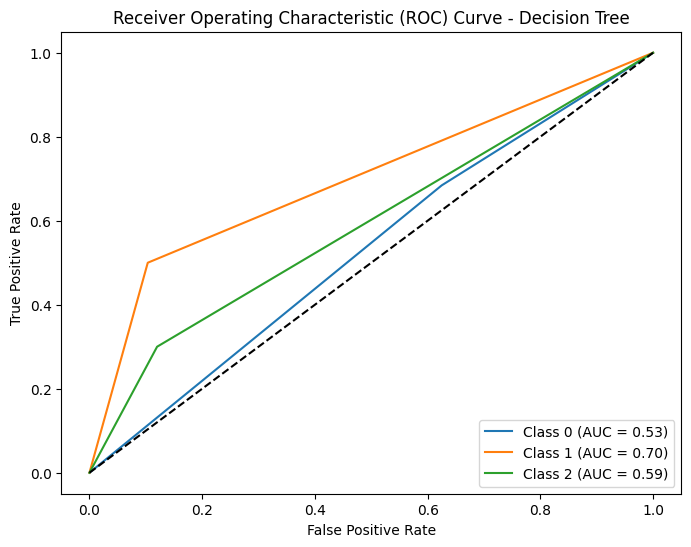


Training Naive Bayes model...
Accuracy: 68.57%
F1-score: 69.82%
Recall: 68.57%
Precision: 74.17%


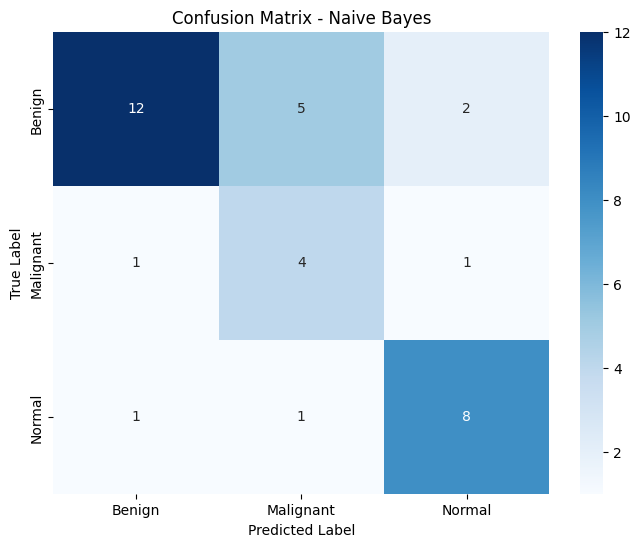

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

      Benign       0.86      0.63      0.73        19
   Malignant       0.40      0.67      0.50         6
      Normal       0.73      0.80      0.76        10

    accuracy                           0.69        35
   macro avg       0.66      0.70      0.66        35
weighted avg       0.74      0.69      0.70        35



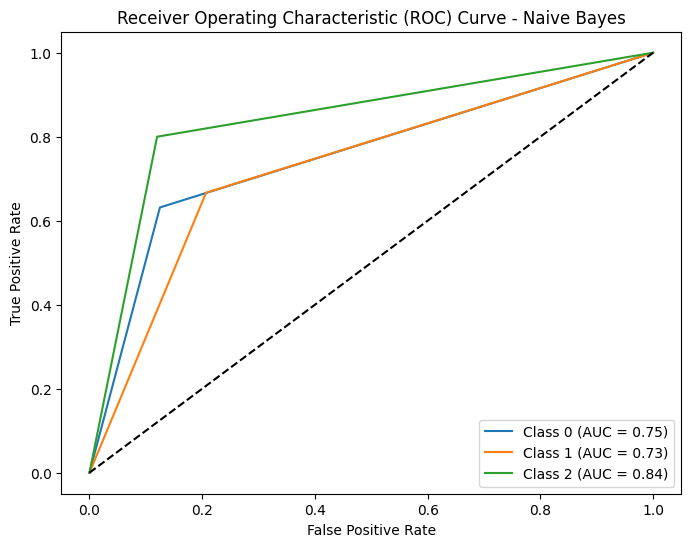


Training K-Nearest Neighbors model...
Accuracy: 60.0%
F1-score: 59.99%
Recall: 60.0%
Precision: 61.11%


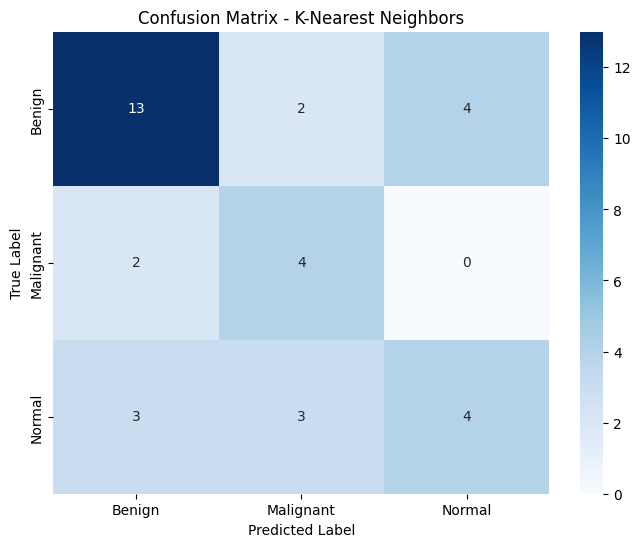

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

      Benign       0.72      0.68      0.70        19
   Malignant       0.44      0.67      0.53         6
      Normal       0.50      0.40      0.44        10

    accuracy                           0.60        35
   macro avg       0.56      0.58      0.56        35
weighted avg       0.61      0.60      0.60        35



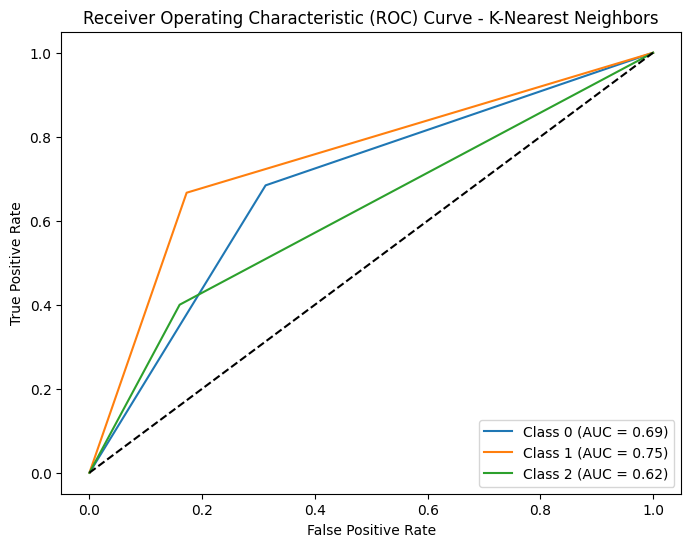


Final Performance Metrics Summary:
Logistic Regression: {'Accuracy': 74.29, 'F1-score': 74.73, 'Recall': 74.29, 'Precision': 76.75}
SVM: {'Accuracy': 77.14, 'F1-score': 76.61, 'Recall': 77.14, 'Precision': 77.87}
Random Forest: {'Accuracy': 74.29, 'F1-score': 72.17, 'Recall': 74.29, 'Precision': 79.09}
Decision Tree: {'Accuracy': 54.29, 'F1-score': 52.89, 'Recall': 54.29, 'Precision': 53.54}
Naive Bayes: {'Accuracy': 68.57, 'F1-score': 69.82, 'Recall': 68.57, 'Precision': 74.17}
K-Nearest Neighbors: {'Accuracy': 60.0, 'F1-score': 59.99, 'Recall': 60.0, 'Precision': 61.11}


In [14]:
# Dictionary to store performance metrics for each classifier
performance_metrics = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\nTraining {name} model...")

    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = round(accuracy_score(Y_test, Y_pred) * 100, 2)
    f1 = round(f1_score(Y_test, Y_pred, average='weighted') * 100, 2)
    recall = round(recall_score(Y_test, Y_pred, average='weighted') * 100, 2)
    precision = round(precision_score(Y_test, Y_pred, average='weighted') * 100, 2)

    # Store metrics
    performance_metrics[name] = {
        'Accuracy': accuracy,
        'F1-score': f1,
        'Recall': recall,
        'Precision': precision
    }

    print(f"Accuracy: {accuracy}%")
    print(f"F1-score: {f1}%")
    print(f"Recall: {recall}%")
    print(f"Precision: {precision}%")

    # Confusion matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant', 'Normal'], yticklabels=['Benign', 'Malignant', 'Normal'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Classification Report
    print(f"Classification Report for {name}:\n")
    print(classification_report(Y_test, Y_pred, target_names=['Benign', 'Malignant', 'Normal']))

    # AUC ROC Curve (One-vs-Rest for multiclass classification)
    Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2])
    Y_pred_bin = label_binarize(Y_pred, classes=[0, 1, 2])

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):  # Only 3 classes
        fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve for all classes
    plt.figure(figsize=(8, 6))
    for i in range(3):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

# Final performance summary
print("\nFinal Performance Metrics Summary:")
for name, metrics in performance_metrics.items():
    print(f"{name}: {metrics}")

Processing Image: X10.jpg



<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conve

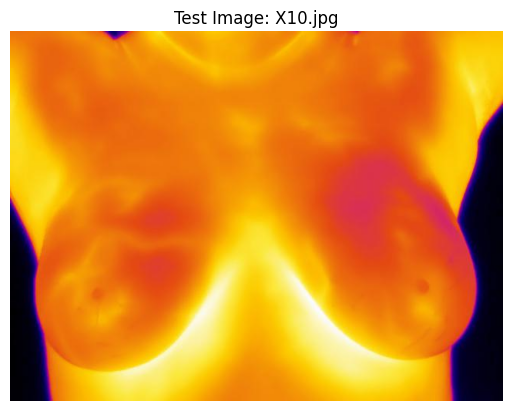

  Logistic Regression: Classified as: Malignant
  SVM: Classified as: Malignant
  Random Forest: Classified as: Malignant
  Decision Tree: Classified as: Malignant
  Naive Bayes: Classified as: Malignant
  K-Nearest Neighbors: Classified as: Benign


Processing Image: X4.jpg



<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conve

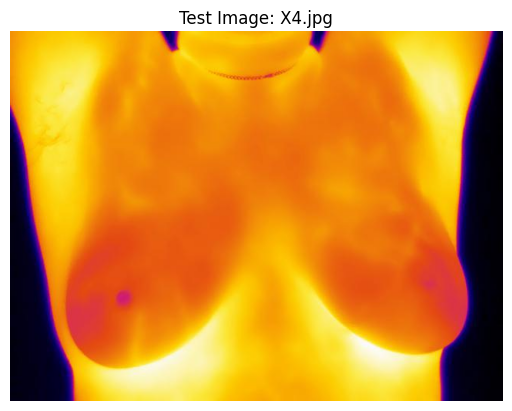

  Logistic Regression: Classified as: Malignant
  SVM: Classified as: Benign
  Random Forest: Classified as: Malignant
  Decision Tree: Classified as: Malignant
  Naive Bayes: Classified as: Malignant
  K-Nearest Neighbors: Classified as: Benign


Processing Image: X7.jpg



<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conve

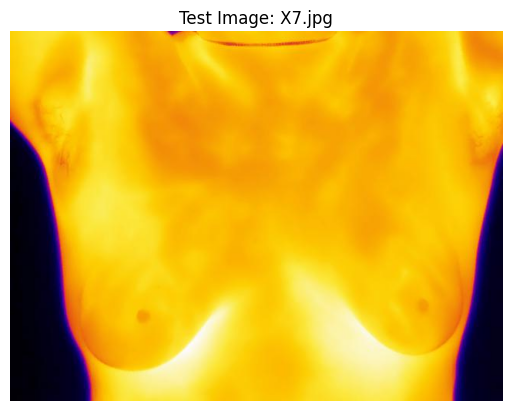

  Logistic Regression: Classified as: Malignant
  SVM: Classified as: Malignant
  Random Forest: Classified as: Malignant
  Decision Tree: Classified as: Malignant
  Naive Bayes: Classified as: Malignant
  K-Nearest Neighbors: Classified as: Malignant


Processing Image: X9.jpg



<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conve

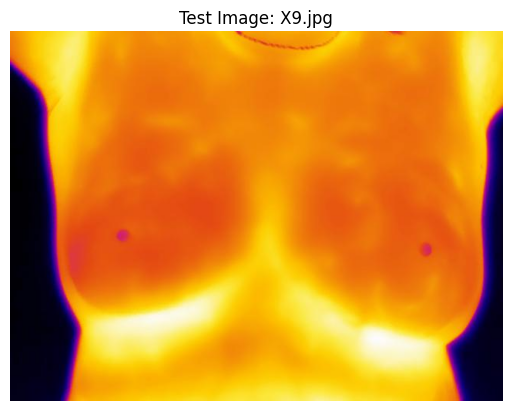

  Logistic Regression: Classified as: Malignant
  SVM: Classified as: Malignant
  Random Forest: Classified as: Malignant
  Decision Tree: Classified as: Malignant
  Naive Bayes: Classified as: Malignant
  K-Nearest Neighbors: Classified as: Normal


Processing Image: X3.jpg



<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conve

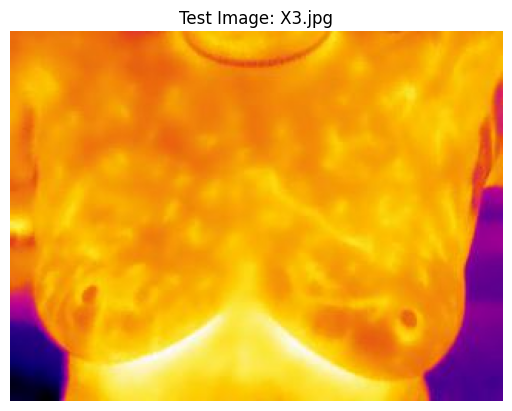

  Logistic Regression: Classified as: Malignant
  SVM: Classified as: Malignant
  Random Forest: Classified as: Malignant
  Decision Tree: Classified as: Malignant
  Naive Bayes: Classified as: Malignant
  K-Nearest Neighbors: Classified as: Malignant


Processing Image: X1.jpg



<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conve

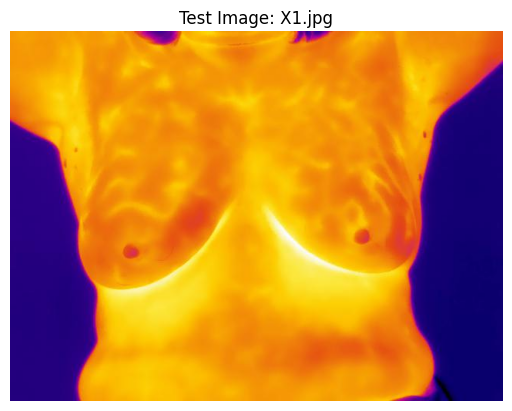

  Logistic Regression: Classified as: Benign
  SVM: Classified as: Benign
  Random Forest: Classified as: Benign
  Decision Tree: Classified as: Malignant
  Naive Bayes: Classified as: Normal
  K-Nearest Neighbors: Classified as: Benign


Processing Image: X2.jpg



<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conve

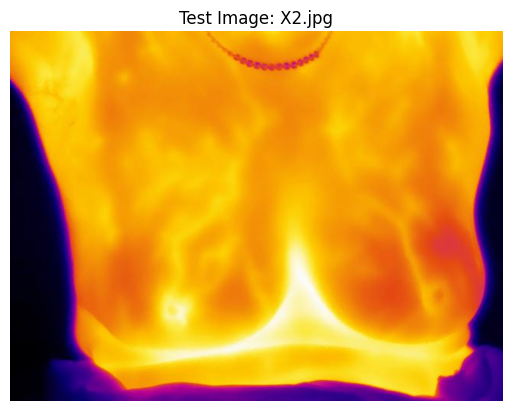

  Logistic Regression: Classified as: Malignant
  SVM: Classified as: Malignant
  Random Forest: Classified as: Malignant
  Decision Tree: Classified as: Malignant
  Naive Bayes: Classified as: Malignant
  K-Nearest Neighbors: Classified as: Malignant


Processing Image: X5.jpg



<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conve

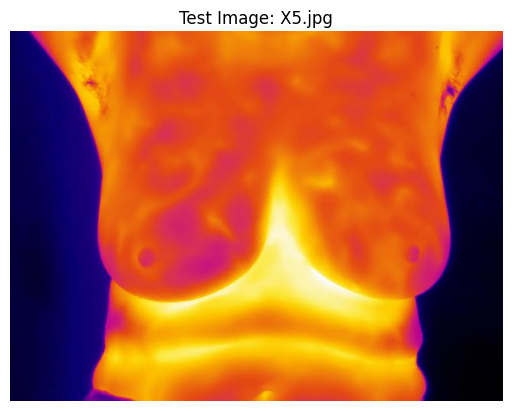

  Logistic Regression: Classified as: Benign
  SVM: Classified as: Benign
  Random Forest: Classified as: Benign
  Decision Tree: Classified as: Normal
  Naive Bayes: Classified as: Normal
  K-Nearest Neighbors: Classified as: Benign


Processing Image: X6.jpg



<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conve

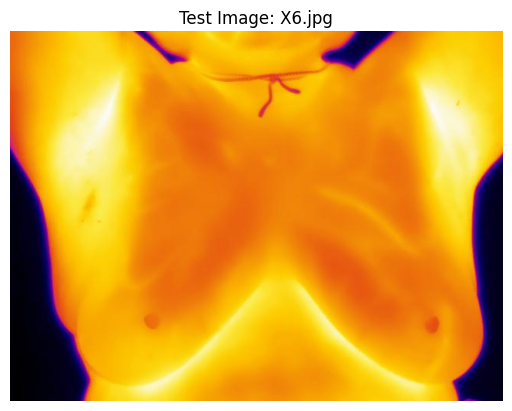

  Logistic Regression: Classified as: Malignant
  SVM: Classified as: Normal
  Random Forest: Classified as: Malignant
  Decision Tree: Classified as: Normal
  Naive Bayes: Classified as: Malignant
  K-Nearest Neighbors: Classified as: Malignant


Processing Image: X8.jpg



<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(prediction)]
<ipython-input-15-612140fe6adc>:22: DeprecationWarning: Conve

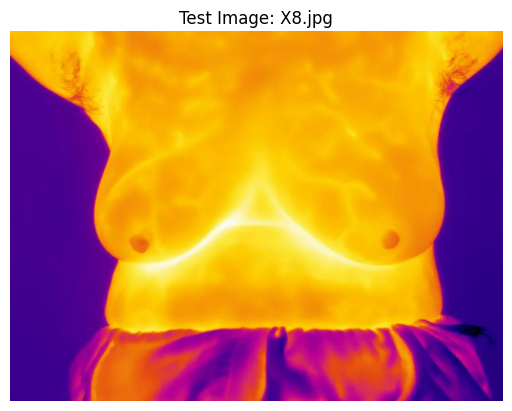

  Logistic Regression: Classified as: Benign
  SVM: Classified as: Benign
  Random Forest: Classified as: Benign
  Decision Tree: Classified as: Benign
  Naive Bayes: Classified as: Benign
  K-Nearest Neighbors: Classified as: Benign




In [15]:
# Train each classifier before testing the uploaded images
classifiers['Logistic Regression'].fit(X_train, Y_train)
classifiers['SVM'].fit(X_train, Y_train)
classifiers['Random Forest'].fit(X_train, Y_train)
classifiers['Decision Tree'].fit(X_train, Y_train)
classifiers['Naive Bayes'].fit(X_train, Y_train)
classifiers['K-Nearest Neighbors'].fit(X_train, Y_train)

# Function to preprocess and predict a single test image using all classifiers
def test_uploaded_image_all_classifiers_with_display(classifiers, test_image_path):
    try:
        # Load and preprocess the test image
        img = Image.open(test_image_path).convert("RGB")
        img_resized = img.resize((64, 64))
        img_array = np.array(img_resized).reshape(1, -1)

        # Predict the class of the image using all classifiers
        results = {}
        for classifier_name, classifier in classifiers.items():
            prediction = classifier.predict(img_array)
            class_labels = ['Benign', 'Malignant', 'Normal']
            predicted_class_label = class_labels[int(prediction)]
            results[classifier_name] = predicted_class_label

        # Display the image
        plt.imshow(img)
        plt.title(f"Test Image: {test_image_path.split('/')[-1]}")
        plt.axis('off')
        plt.show()

        return results
    except Exception as e:
        return f"Error processing the image: {str(e)}"

# Path to test images
test_images_path = "/content/drive/MyDrive/BCD/Images/Test images"
test_images = os.listdir(test_images_path)

# Loop through all images in the directory and classify them using all classifiers
for image_name in test_images:
    image_path = os.path.join(test_images_path, image_name)

    # Only classify files with a valid image extension
    if image_path.endswith((".jpg", ".jpeg", ".png")):
        print(f"Processing Image: {image_name}\n")
        results = test_uploaded_image_all_classifiers_with_display(classifiers, image_path)

        # Print classification results
        if isinstance(results, dict):
            for classifier_name, predicted_class in results.items():
                print(f"  {classifier_name}: Classified as: {predicted_class}")
            print("\n")
        else:
            print(f"Error processing image {image_name}: {results}")